In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data/heart-disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
columns = list(data.columns)
con_columns = ["sex","fbs","age","trestbps","chol","thalach","exang","oldpeak","target"]
cat_columns = [x for x in columns if x not in con_columns]
cat_columns

['cp', 'restecg', 'slope', 'ca', 'thal']

In [4]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Label Encoding

In [8]:
label = "target"
X = data.drop(label,axis=1)
y = data[label]

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

def evaluate_classification_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test,y_pred):.4f}")
    print(f"Recall: {recall_score(y_test,y_pred):.4f}")
    print(f"Precision: {precision_score(y_test,y_pred):.4f}")
    print(f"F1: {f1_score(y_test,y_pred):.4f}")
    conf_mat = confusion_matrix(y_test,y_pred)
    sns.heatmap(conf_mat, annot=True, fmt="d",
                xticklabels=lr.classes_, yticklabels=lr.classes_)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label=f"AUC={auc:.2f}")
    plt.legend(loc=4)
    plt.show()

Accuracy: 0.8852
Recall: 0.9062
Precision: 0.8788
F1: 0.8923


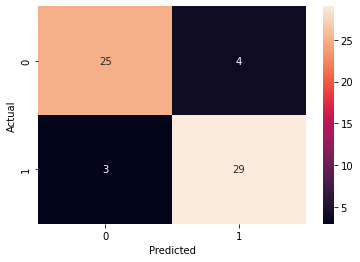

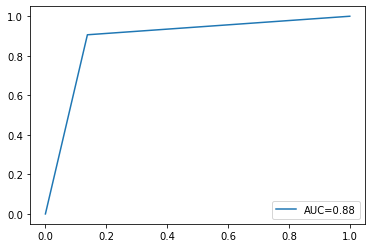

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
evaluate_classification_model(lr,X_test,y_test)

Accuracy: 0.8197
Recall: 0.7188
Precision: 0.9200
F1: 0.8070


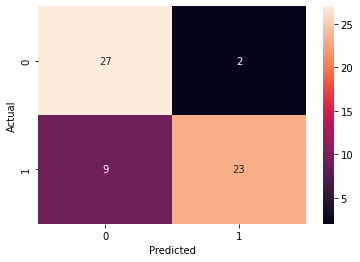

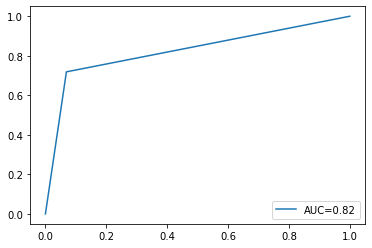

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
evaluate_classification_model(dt,X_test,y_test)

Accuracy: 0.8525
Recall: 0.8750
Precision: 0.8485
F1: 0.8615


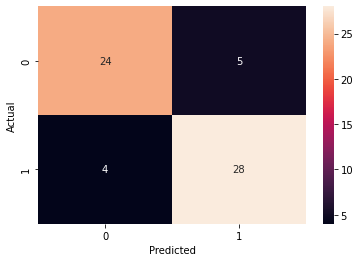

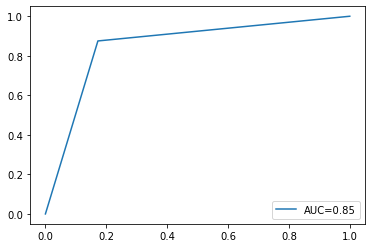

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
evaluate_classification_model(rf,X_test,y_test)

Accuracy: 0.7049
Recall: 0.8750
Precision: 0.6667
F1: 0.7568


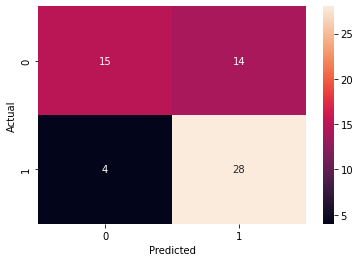

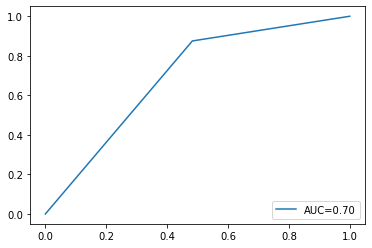

In [14]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
evaluate_classification_model(svc,X_test,y_test)

[15:35:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8197
Recall: 0.7812
Precision: 0.8621
F1: 0.8197


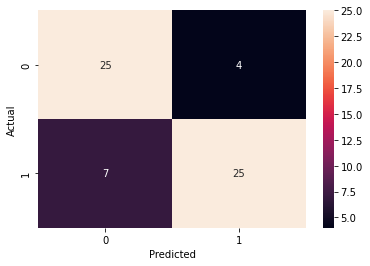

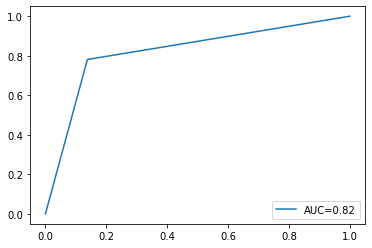

In [15]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
evaluate_classification_model(xgb,X_test,y_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print(i,knn.score(X_test,y_test))

1 0.6229508196721312
2 0.639344262295082
3 0.6557377049180327
4 0.6721311475409836
5 0.6885245901639344
6 0.7213114754098361
7 0.7049180327868853
8 0.6885245901639344
9 0.6885245901639344
10 0.7049180327868853


Accuracy: 0.7213
Recall: 0.7188
Precision: 0.7419
F1: 0.7302


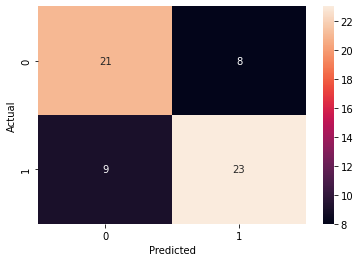

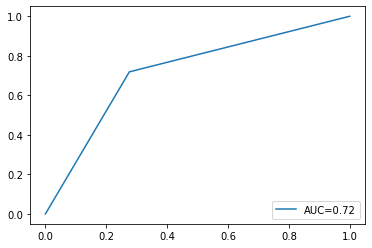

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
evaluate_classification_model(knn,X_test,y_test)

### One Hot Encoding

In [18]:
cat_columns

['cp', 'restecg', 'slope', 'ca', 'thal']

In [19]:
from sklearn.preprocessing import LabelBinarizer

def to_one_hot(data,col):
    print(end=f"{col}: ")
    name = f"{col}_"
    encoder = LabelBinarizer()
    encoder.fit(data[col])
    encoded = encoder.transform(data[col])

    classes = list(encoder.classes_)
    total_classes = len(classes)

    for i in range(total_classes):
        data[f'{name}{classes[i]}'] = encoded[:, i]
    data.drop(col,axis=1,inplace=True)
    print("Done")

In [20]:
for col in cat_columns:
    to_one_hot(data,col)
data

cp: Done
restecg: Done
slope: Done
ca: Done
thal: Done


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,1,...,0,1,0,0,0,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,0,1,...,0,0,0,1,0,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,0,1,...,0,0,1,0,0,0,0,0,0,1


In [21]:
label = "target"
X = data.drop(label,axis=1)
y = data[label]

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Accuracy: 0.9016
Recall: 0.9062
Precision: 0.9062
F1: 0.9062


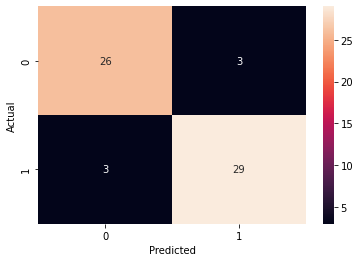

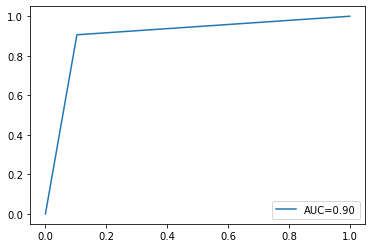

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
evaluate_classification_model(lr,X_test,y_test)

Accuracy: 0.8033
Recall: 0.7812
Precision: 0.8333
F1: 0.8065


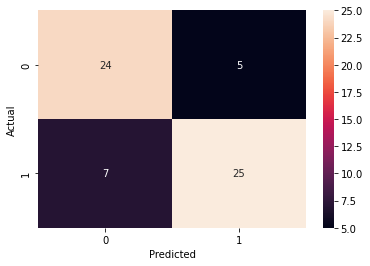

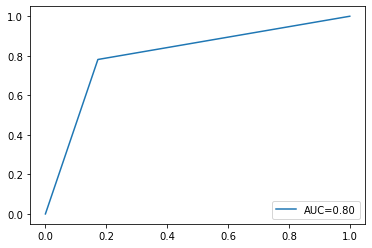

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
evaluate_classification_model(dt,X_test,y_test)

Accuracy: 0.8525
Recall: 0.8438
Precision: 0.8710
F1: 0.8571


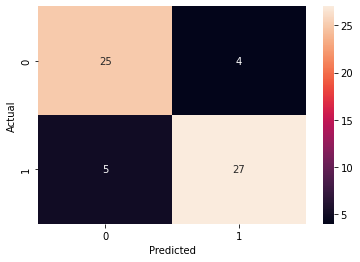

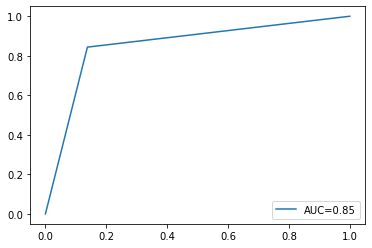

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
evaluate_classification_model(rf,X_test,y_test)

In [34]:
feature_importances = pd.DataFrame()
feature_importances["feature"] = X_train.columns
feature_importances["importance"] = rf.feature_importances_
feature_importances.sort_values(by="importance",ascending=False)

,feature,importance
25,thal_2,0.092466
7,oldpeak,0.092065
5,thalach,0.089330
18,ca_0,0.086028
0,age,0.078620
8,cp_0,0.078109
2,trestbps,0.071387
3,chol,0.066323
26,thal_3,0.057610
6,exang,0.056266


Accuracy: 0.7049
Recall: 0.8750
Precision: 0.6667
F1: 0.7568


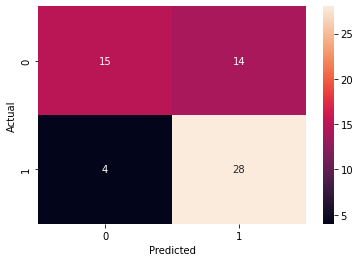

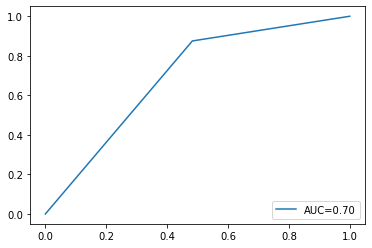

In [26]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
evaluate_classification_model(svc,X_test,y_test)

[15:35:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8361
Recall: 0.7812
Precision: 0.8929
F1: 0.8333


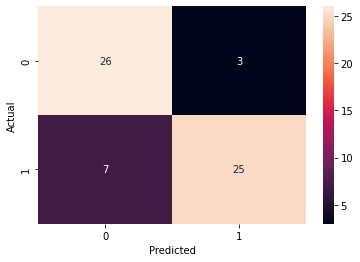

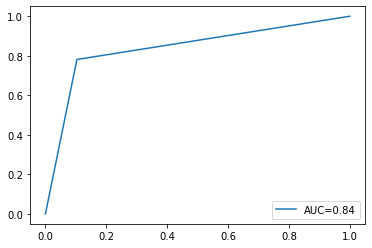

In [27]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
evaluate_classification_model(xgb,X_test,y_test)

In [35]:
feature_importances = pd.DataFrame()
feature_importances["feature"] = X_train.columns
feature_importances["importance"] = xgb.feature_importances_
feature_importances.sort_values(by="importance",ascending=False)

,feature,importance
25,thal_2,0.405550
8,cp_0,0.096985
18,ca_0,0.062816
7,oldpeak,0.049406
6,exang,0.048427
16,slope_1,0.038214
19,ca_1,0.036310
9,cp_1,0.032606
20,ca_2,0.031711
1,sex,0.025704


In [28]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print(i,knn.score(X_test,y_test))

1 0.6229508196721312
2 0.639344262295082
3 0.6557377049180327
4 0.6721311475409836
5 0.6885245901639344
6 0.7213114754098361
7 0.7049180327868853
8 0.6885245901639344
9 0.6721311475409836
10 0.7049180327868853


Accuracy: 0.7213
Recall: 0.7188
Precision: 0.7419
F1: 0.7302


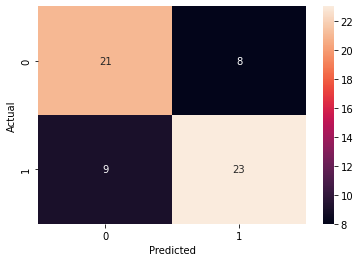

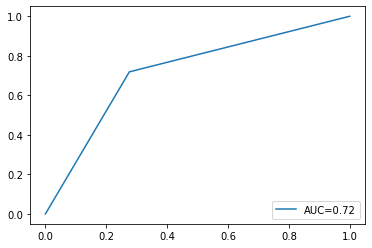

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
evaluate_classification_model(knn,X_test,y_test)

In [30]:
from sklearn.metrics import classification_report

y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

